## Réseau Neurones Convolutif - Chiffres

#### 1. Imporation Library

In [18]:
import numpy as np

from keras.models import Sequential, Model, save_model
from keras.layers import Dense, Activation, Input
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils import to_categorical

import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn import metrics

#### 2. Load dataset MNIST (base de données d'image de chiffres)

In [19]:
# Pour importer le datasets mnist de Keras
from keras.datasets.mnist import load_data

# Chargement des données MNIST
(X_train, y_train), (X_test, y_test) = load_data()

# Changer la forme de X_train et X_test
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

#### 3. Normalisation des vecteurs train et test

In [20]:
X_train = X_train / 255
X_test = X_test / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#### 4. Architecture du modèle

In [21]:
lenet = Sequential()

# Convolution de l'image (accentuer les traits qui nous seront utiles pour prédire les chiffres)
lenet.add(Conv2D(filters = 30,                     # Nombre de filtres
                kernel_size = (5, 5),            # Dimensions du noyau
                padding = 'valid',               # Mode de Dépassement
                input_shape = (28, 28, 1),       # Dimensions de l'image en entrée
                activation = 'relu'))             # Fonction d'activation

lenet.add(MaxPooling2D(pool_size = (2, 2))) # Réduction de l'image

# 2e convolution
lenet.add(Conv2D(filters = 16,
                kernel_size = (3, 3),
                padding = 'valid',
                activation = 'relu'))

lenet.add(MaxPooling2D(pool_size = (2, 2))) # 2e réduction de l'image

lenet.add(Flatten()) # Applatissement des matrices en vecteurs avant l'entrée dans les couches profondes

lenet.add(Dropout(rate = 0.2)) # Suppressions aléatoires de certains inputs pour éviter le sur-apprentissage

lenet.add(Dense(units = 128,
                activation = 'relu')) # Couche profonde cachée

lenet.add(Dense(units = 10,
                activation = 'softmax')) # Couche profonde de sortie

# Compilation
lenet.compile(loss='categorical_crossentropy',  # fonction de perte
              optimizer='adam',                 # algorithme de descente de gradient
              metrics=['accuracy'])             # métrique d'évaluation

# Entraînement
training_history_lenet = lenet.fit(X_train, y_train,          # données
                                   validation_split = 0.2,    # split de test, pour évaluer surveiller l'efficacité de notre modèle pendant son entrainement
                                   epochs = 16,               # nombre d'epochs (nombre de fois que l'on entraine notre modèle)
                                   batch_size = 200)          # taille des batchs


Epoch 1/16
112/240 [=============>................] - ETA: 2s - loss: 0.7521 - accuracy: 0.7655

#### 5. Performance du modèle durant l'entrainement

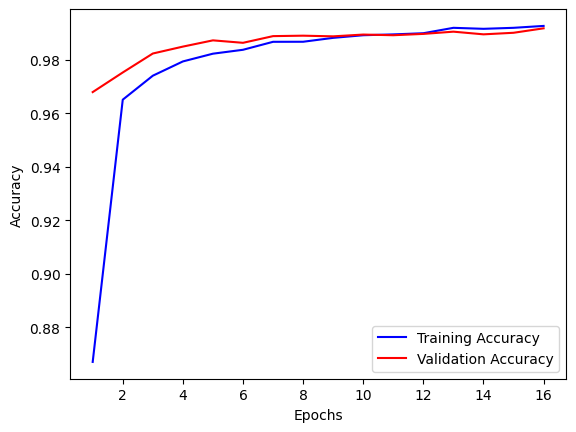

In [ ]:
# Labels des axes
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Courbe de la précision sur l'échantillon d'entrainement
plt.plot(np.arange(1 , 17, 1),
         training_history_lenet.history['accuracy'],
         label = 'Training Accuracy',
         color = 'blue')

# Courbe de la précision sur l'échantillon de test
plt.plot(np.arange(1 , 17, 1),
         training_history_lenet.history['val_accuracy'],
         label = 'Validation Accuracy',
         color = 'red')

# Affichage de la légende
plt.legend()

# Affichage de la figure
plt.show()

#### 6. Réussite du modèle sur des nouvelles images (ici, accuracy = 99% de réussite)

In [ ]:
test_pred_lenet = lenet.predict(X_test)
test_pred_lenet_class = test_pred_lenet.argmax(axis = 1)
y_test_class = y_test.argmax(axis = 1)

print(metrics.classification_report(y_test_class, test_pred_lenet_class))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



#### 7. Sauvegarde du modèle

In [ ]:
lenet.save("Trained_models/CNN_Digits.h5")

C:\Users\yoann\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### 8. Exemple de prédictions réussites du modèle

In [ ]:
right_indexes = []
for i in range(len(test_pred_lenet)):
    if (test_pred_lenet_class[i] == y_test_class[i]):
                right_indexes += [i]

j = 1
for i in np.random.choice(right_indexes, size = 3):
    img = X_test[i]
    img = img.reshape(28, 28)

    plt.subplot(1, 3, j)
    j = j + 1
    plt.axis('off')
    plt.imshow(img,cmap = cm.binary, interpolation='None')
    plt.title('True Label: ' + str(y_test_class[i]) \
              + '\n' + 'Prediction: '+ str(test_pred_lenet_class[i]) \
              + '\n' + 'Confidence: '+ str(round(test_pred_lenet[i][test_pred_lenet_class[i]], 2)))

ValueError: 'a' cannot be empty unless no samples are taken

#### 9. Exemple d'erreur de prédictions du modèle

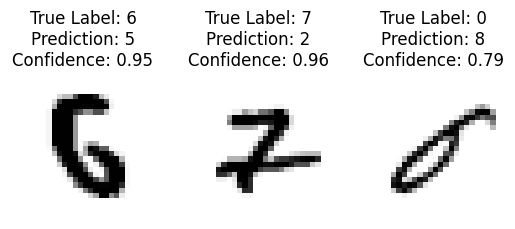

In [ ]:
error_indexes = []
for i in range(len(test_pred_lenet)):
    if (test_pred_lenet_class[i] != y_test_class[i]):
                error_indexes += [i]

j = 1
for i in np.random.choice(error_indexes, size = 3):
    img = X_test[i]
    img = img.reshape(28, 28)

    plt.subplot(1, 3, j)
    j = j + 1
    plt.axis('off')
    plt.imshow(img,cmap = cm.binary, interpolation='None')
    plt.title('True Label: ' + str(y_test_class[i]) \
              + '\n' + 'Prediction: '+ str(test_pred_lenet_class[i]) \
              + '\n' + 'Confidence: '+ str(round(test_pred_lenet[i][test_pred_lenet_class[i]], 2)))

## Bonus : Test du modèle avec nos propres images

### 1. Prédiction

1/1 [==============================] - 0s 12ms/step


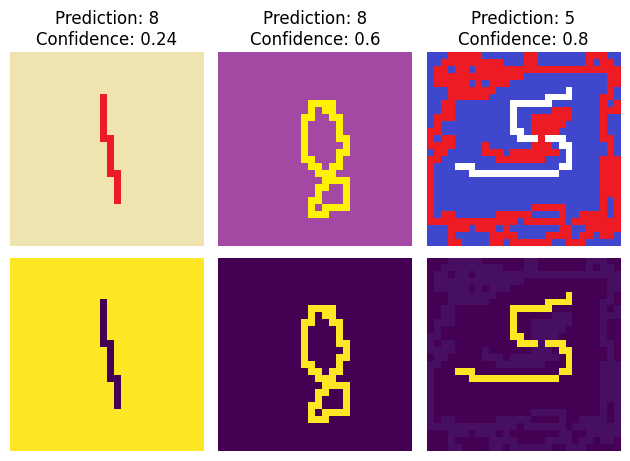

In [ ]:
import os
from keras.preprocessing import image

dossier_images = 'Digits_exemple'
images = []
images_couleur = []

for fichier in os.listdir(dossier_images):
    if fichier.endswith(".png"):
        chemin_image = os.path.join(dossier_images, fichier)

        images_couleur.append(image.load_img(chemin_image))

        img = image.load_img(chemin_image, target_size=(28, 28), color_mode='grayscale')
        img_array = image.img_to_array(img)
        img_array /= 255.0

        images.append(img_array)

images_array = np.array(images)

test_pred_lenet = lenet.predict(images_array)
test_pred_lenet_class = test_pred_lenet.argmax(axis = 1)

j = 1
for i in range(len(images_array)):
    img = images_couleur[i]

    plt.subplot(2, 3, j)
    j = j + 1
    plt.axis('off')
    plt.imshow(img, interpolation='None')
    plt.title( 'Prediction: ' + str(test_pred_lenet_class[i]) \
              + '\n' + 'Confidence: ' + str(round(test_pred_lenet[i][test_pred_lenet_class[i]], 2)))

for i in range(len(images_array)):
    img = images[i]

    plt.subplot(2, 3, j)
    j = j + 1
    plt.axis('off')
    plt.imshow(img, interpolation='None')

plt.tight_layout()
plt.show()

##### 1e ligne = images réelles
##### 2e ligne = images que le modèle interprète (Pixel = 0.299 * R + 0.587 * G + 0.114 * B)

### 2. Prédictions avec colorimétrie inversée

1/1 [==============================] - 0s 11ms/step


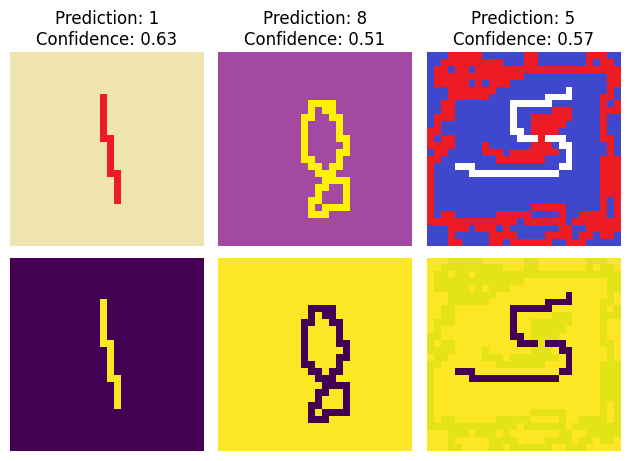

In [ ]:

images_array = 1 - np.array(images)

test_pred_lenet = lenet.predict(images_array)
test_pred_lenet_class = test_pred_lenet.argmax(axis = 1)

j = 1
for i in range(len(images_array)):
    img = images_couleur[i]

    plt.subplot(2, 3, j)
    j = j + 1
    plt.axis('off')
    plt.imshow(img, interpolation='None')
    plt.title( 'Prediction: ' + str(test_pred_lenet_class[i]) \
              + '\n' + 'Confidence: ' + str(round(test_pred_lenet[i][test_pred_lenet_class[i]], 2)))

for i in range(len(images_array)):
    img = images_array[i]

    plt.subplot(2, 3, j)
    j = j + 1
    plt.axis('off')
    plt.imshow(img, interpolation='None')

plt.tight_layout()
plt.show()

#### A voir si notre modèle est plus efficace en intèprétant des images avec colorimétrie inversée